In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [3]:
result_loc = "./../../../../Server_results/01_28_2022_w_bounds/"
run_name = "experiment04_02_07_45_12"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

# result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
# run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [4]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [5]:
q_x.shape

(131, 64, 50)

In [6]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [7]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


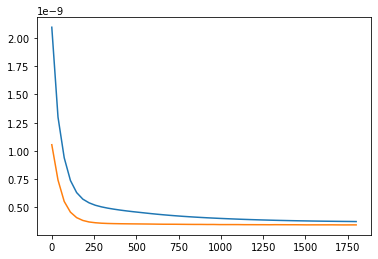

In [9]:
epoch = 121
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


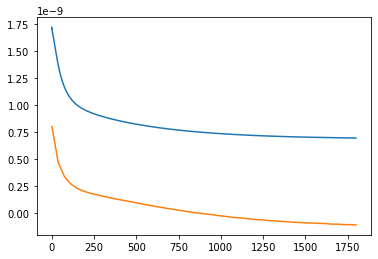

In [31]:
epoch = 1


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

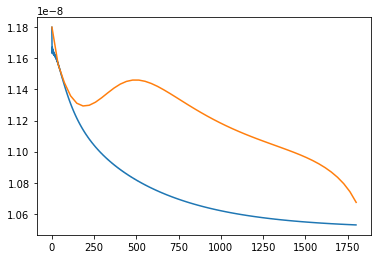

In [43]:
epoch = 5
plt.plot(q_MC_x.mean(axis=0))
# plt.plot(q_MC_x.min(axis=0))
# plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [12]:
p[50,:]

array([3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
      

In [13]:
k_x[50,:,40]

array([1.28984372e-05, 9.28444997e-06, 1.50183633e-05, 4.53988252e-05,
       1.27839095e-05, 1.18706582e-05, 1.26862319e-05, 4.54001347e-05,
       1.18190862e-05, 1.18712855e-05, 1.18706727e-05, 4.54009559e-05,
       1.47020515e-05, 1.88470531e-05, 1.26867617e-05, 4.53996804e-05,
       1.28981040e-05, 9.28391339e-06, 1.50179335e-05, 4.54001511e-05,
       1.27841533e-05, 1.18703496e-05, 1.26864174e-05, 4.54009018e-05,
       1.13668879e-05, 1.18713931e-05, 1.18709144e-05, 4.54010397e-05,
       1.47030833e-05, 1.88469587e-05, 1.26868396e-05, 4.54009675e-05,
       4.52699992e-05, 4.53690548e-05, 4.53953294e-05, 4.53110895e-05,
       4.53247784e-05, 4.53633862e-05, 4.51603873e-05, 4.53991462e-05,
       4.52169715e-05, 4.53995169e-05, 4.53989357e-05, 4.52613362e-05,
       4.53945094e-05, 4.53200219e-05, 4.52751011e-05, 4.53502238e-05,
       4.54004936e-05, 4.52355483e-05, 4.53552409e-05, 4.53160952e-05,
       4.53337444e-05, 4.53012543e-05, 4.53027155e-05, 4.53051166e-05,
      

In [14]:
k_xy[36,:,40]

array([-2.20836614e-06, -1.41258146e-06, -1.54792643e-06,  1.01440617e-06,
       -7.26108477e-06, -2.86868533e-06, -1.54758415e-06,  1.01442230e-06,
       -2.10301696e-06, -2.11192115e-06, -2.11683924e-06, -2.11232533e-06,
       -2.11150555e-06, -2.09847487e-06, -2.11047389e-06, -2.10824136e-06,
       -2.11496373e-06, -2.11340845e-06, -2.11310948e-06, -2.11244180e-06,
       -2.10842719e-06, -2.11436819e-06, -2.10758058e-06, -2.10690182e-06,
       -2.10645447e-06, -2.10612617e-06, -2.10694665e-06, -2.11312552e-06,
       -2.10431937e-06, -2.10307994e-06, -2.10410803e-06, -2.10665996e-06,
       -2.11300594e-06, -2.10286628e-06, -2.10231432e-06, -2.10663333e-06,
       -2.11077956e-06, -2.11035599e-06, -2.10777522e-06, -2.10773136e-06,
       -2.10931538e-06, -2.11246835e-06, -2.10154780e-06, -2.11313059e-06,
       -2.11161448e-06, -2.11285612e-06, -2.10012783e-06, -2.11133356e-06,
       -2.10851632e-06, -2.09923910e-06, -2.10442693e-06, -2.10274124e-06,
       -2.11301626e-06, -

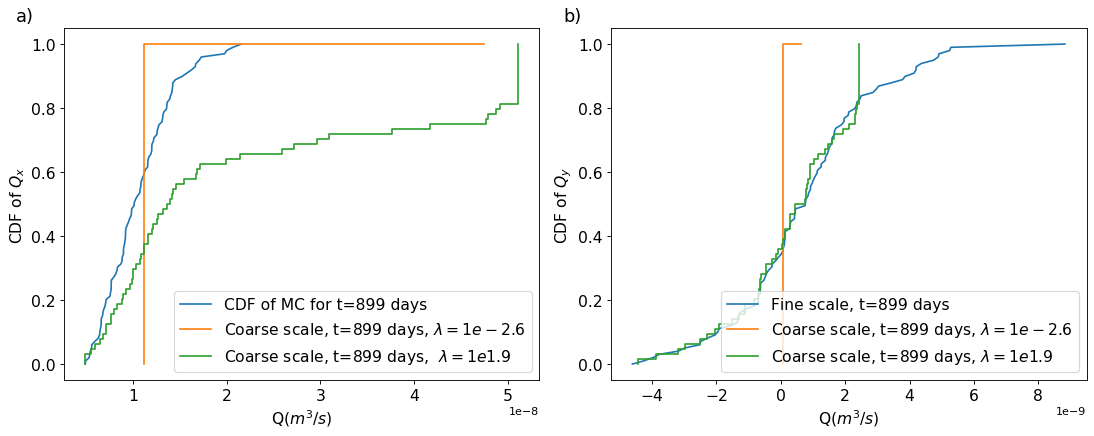

In [41]:
epoch_1 = 10
epoch_2 = 100

time_step = 25


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
# plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [18]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [19]:
# b_perc =df_perc


In [20]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [33]:
epoch = 130
t = np.linspace(0,1800,N_steps)

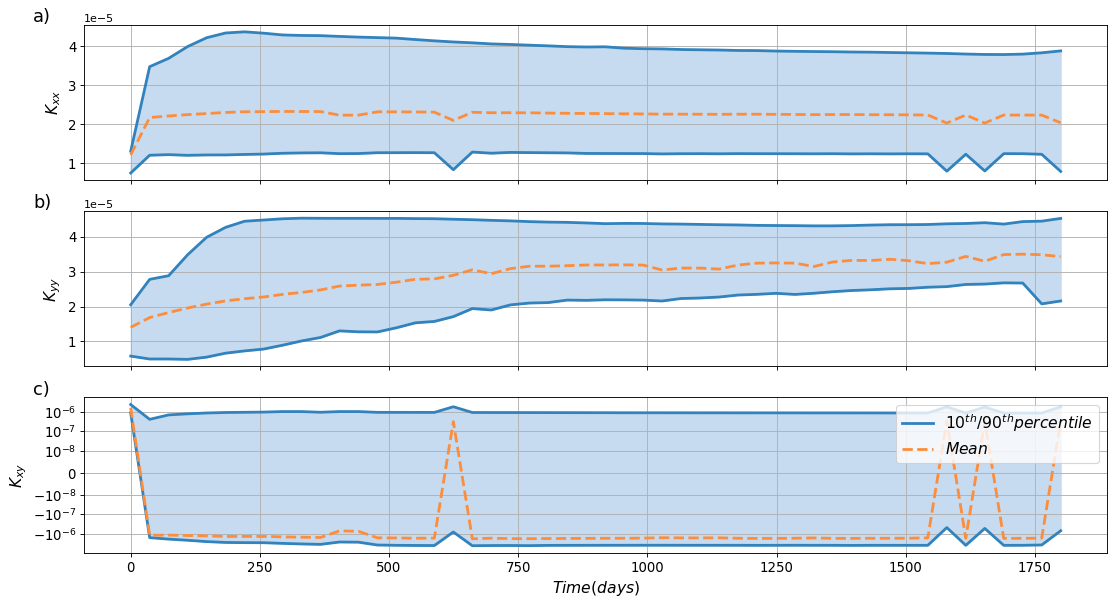

In [34]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [22]:
p[200,:]

array([6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
      